1. Classification with logistic regression:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
%matplotlib inline

1.1. Read in data and explore:

In [2]:
# Load data.
data = load_breast_cancer()

In [3]:
# Display the description.
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [4]:
# Explanatory variables.
X = data['data']
print(data['feature_names'])

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [5]:
X.shape

(569, 30)

In [6]:
# Response variable.
# Relabel such that 0 = 'benign' and 1 = malignant.
Y = 1 - data['target']
label = list(data['target_names'])
label.reverse()
print(label)

[np.str_('benign'), np.str_('malignant')]


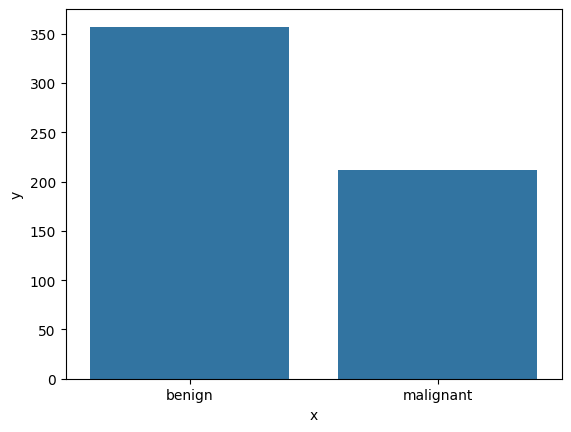

In [7]:
# Visualize the frequency table.
ser = pd.Series(Y)
table = ser.value_counts()
table = table.sort_index()                                         # Has to be sorted for correct labeling.
raw_data = {'x': label, 'y': table.values}
sns.barplot(x='x', y='y', data=raw_data)
plt.show()

1.2. Train and test:

In [8]:
# Split the dataset into training and testing.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=1234)

In [9]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(341, 30)
(228, 30)
(341,)
(228,)


In [10]:
# Train and predict.
LL = LogisticRegression(solver='liblinear',max_iter=200)
LL.fit(X_train,Y_train)
Y_pred_test = LL.predict(X_test)                            # Out-of-sample prediction. 

In [11]:
# Confusion matrix.
conf_mat = metrics.confusion_matrix(Y_test,Y_pred_test)
print(conf_mat)

[[139   5]
 [ 12  72]]


In [12]:
# Accuracy, Sensitivity, Specificity and Precision using the confusion matrix.
accuracy = (conf_mat[0,0] + conf_mat[1,1])/np.sum(conf_mat)
sensitivity = conf_mat[1,1]/(conf_mat[1,0]+conf_mat[1,1])
specificity = conf_mat[0,0]/(conf_mat[0,0]+conf_mat[0,1])
precision = conf_mat[1,1]/(conf_mat[0,1]+conf_mat[1,1])
print('Accuracy    = {}'.format(np.round(accuracy,3)))
print('Sensitvity  = {}'.format(np.round(sensitivity,3)))
print('Specificity = {}'.format(np.round(specificity,3)))
print('Precision   = {}'.format(np.round(precision,3)))

Accuracy    = 0.925
Sensitvity  = 0.857
Specificity = 0.965
Precision   = 0.935


In [13]:
# Alternative way.
accuracy = metrics.accuracy_score(Y_test,Y_pred_test)                      # Alternative way to calculate the accuracy.
sensitivity = metrics.recall_score(Y_test,Y_pred_test)
precision = metrics.precision_score(Y_test,Y_pred_test)
print('Accuracy    = {}'.format(np.round(accuracy,3)))
print('Sensitvity  = {}'.format(np.round(sensitivity,3)))
print('Precision   = {}'.format(np.round(precision,3)))

Accuracy    = 0.925
Sensitvity  = 0.857
Precision   = 0.935


1.3. Cutoff (threshold):

In [14]:
# Now, predict the probability of Y  = 1.
Y_pred_test_prob=LL.predict_proba(X_test)[:,1]

Double-click (or enter) to edit

In [15]:
# One can change the cutoff at will
cutoff = 0.7                                                      # cutoff can be a value between 0 and 1.
Y_pred_test_val = (Y_pred_test_prob > cutoff).astype(int)
conf_mat = metrics.confusion_matrix(Y_test,Y_pred_test_val)
print(conf_mat)

[[143   1]
 [ 13  71]]


In [16]:
accuracy = (conf_mat[0,0] + conf_mat[1,1])/np.sum(conf_mat)
sensitivity = conf_mat[1,1]/(conf_mat[1,0]+conf_mat[1,1])
specificity = conf_mat[0,0]/(conf_mat[0,0]+conf_mat[0,1])
precision = conf_mat[1,1]/(conf_mat[0,1]+conf_mat[1,1])
print('Accuracy    = {}'.format(np.round(accuracy,3)))
print('Sensitvity  = {}'.format(np.round(sensitivity,3)))
print('Specificity = {}'.format(np.round(specificity,3)))
print('Precision   = {}'.format(np.round(precision,3)))

Accuracy    = 0.939
Sensitvity  = 0.845
Specificity = 0.993
Precision   = 0.986


1.4. ROC curve:

In [17]:
# Initialize.
cutoff_grid = np.linspace(0.0,1.0,100)
TPR = []                                                   # True Positive Rate.
FPR = []                                                   # False Positive Rate.

In [18]:
# Populate the TP and FP lists.
for cutoff in cutoff_grid:
    Y_pred_test_val = (Y_pred_test_prob > cutoff).astype(int)
    conf_mat = metrics.confusion_matrix(Y_test,Y_pred_test_val)
    sensitivity = conf_mat[1,1]/(conf_mat[1,0]+conf_mat[1,1])
    specificity = conf_mat[0,0]/(conf_mat[0,0]+conf_mat[0,1])
    TPR.append(sensitivity)
    FPR.append(1-specificity)                             

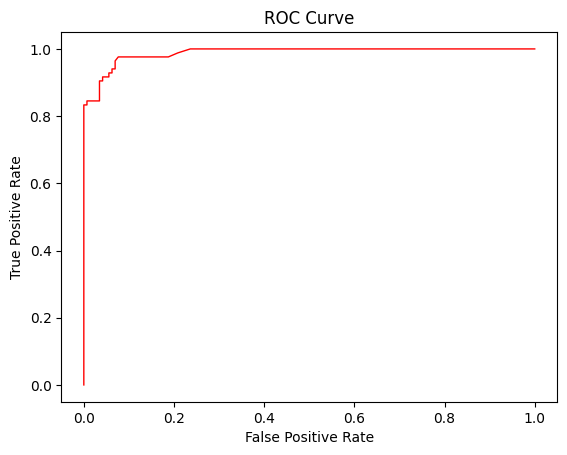

In [19]:
# Visualize.
plt.plot(FPR,TPR,c='red',linewidth=1.0)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

1.5. ROC curve (sklearn):

In [20]:
# Calculate the TPR and FPR using a Scikit Learn function.
FPR, TPR, cutoffs = metrics.roc_curve(Y_test,Y_pred_test_prob,pos_label=1)      # positive label = 1.

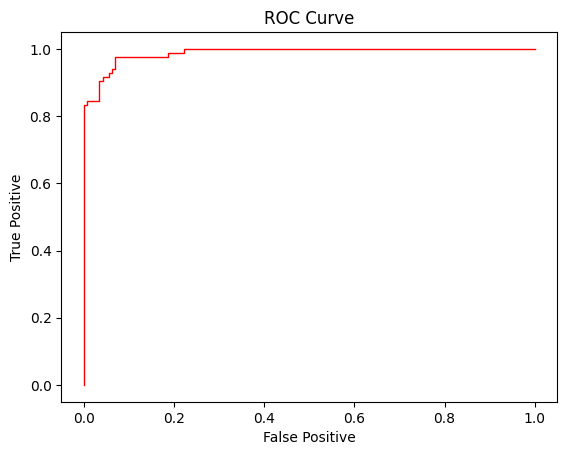

In [21]:
# Visualize.
plt.plot(FPR,TPR,c='red',linewidth=1.0)
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('ROC Curve')
plt.show()

In [22]:
# AUC.
auc = metrics.roc_auc_score(Y_test,Y_pred_test_prob)
print('AUC  = {}'.format(np.round(auc,3)))

AUC  = 0.989
